In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:xlabel='x', ylabel='y'>

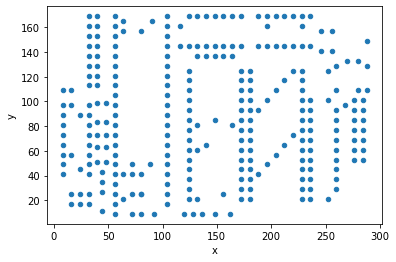

In [16]:
data = pd.read_csv('a280.tsp.txt', delim_whitespace=True, header=None, skiprows = 6)
data.rename(columns = {0:'Node', 1:'x', 2:'y'}, inplace=True)
data.drop(data.tail(1).index,inplace=True)
data.plot.scatter('x', 'y')

In [17]:
optimal = pd.read_csv('a280.opt.tour.txt', sep=" ", header=None, skiprows = 4)
optimal.drop(optimal.tail(1).index,inplace=True)
optimal_path = optimal[0].to_numpy()
optimal_path = list(map(int, optimal_path))
optimal_path = np.array(optimal_path)
optimal_path = optimal_path -1


[  1   2 242 243 244 241 240 239 238 237 236 235 234 233 232 231 246 245
 247 250 251 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216
 215 214 213 212 211 210 207 206 205 204 203 202 201 198 197 196 195 194
 193 192 191 190 189 188 187 186 185 184 183 182 181 176 180 179 150 178
 177 151 152 156 153 155 154 129 130 131  20  21 128 127 126 125 124 123
 122 121 120 119 157 158 159 160 175 161 162 163 164 165 166 167 168 169
 170 172 171 173 174 107 106 105 104 103 102 101 100  99  98  97  96  95
  94  93  92  91  90  89 109 108 110 111 112  88  87 113 114 115 117 116
  86  85  84  83  82  81  80  79  78  77  76  75  74  73  72  71  70  69
  68  67  66  65  64  58  57  56  55  54  53  52  51  50  49  48  47  46
  45  44  59  63  62 118  61  60  43  42  41  40  39  38  37  36  35  34
  33  32  31  30  29  28  27  26  22  25  23  24  14  15  13  12  11  10
   9   8   7   6   5   4 277 276 275 274 273 272 271  16  17  18  19 132
 133 134 270 269 135 136 268 267 137 138 139 149 14

In [18]:
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

def get_distance(a, b, coordinates):
    return np.sqrt(np.abs(coordinates[0, a] - coordinates[0, b])**2 + np.abs(coordinates[1, a] - coordinates[1, b])**2)

def get_total_distance(coordinates):
    distance = 0
    for i in range(len(coordinates[0])-1):
        distance += get_distance(i, i+1, coordinates)
    distance+= get_distance(0, len(coordinates[0])-1, coordinates)
    return distance

[[288. 288. 270. 256. 256. 246. 236. 228. 228. 220. 212. 204. 196. 188.
  196. 188. 172. 164. 156. 148. 140. 148. 164. 172. 156. 140. 132. 124.
  116. 104. 104. 104.  90.  80.  64.  64.  56.  56.  56.  56.  56.  56.
   56.  40.  40.  40.  40.  40.  40.  40.  32.  32.  32.  32.  32.  32.
   32.  32.  40.  56.  56.  48.  40.  32.  32.  24.  16.  16.   8.   8.
    8.   8.   8.   8.   8.  16.   8.   8.  24.  32.  32.  32.  32.  32.
   32.  40.  40.  40.  40.  44.  44.  44.  32.  24.  16.  16.  24.  32.
   44.  56.  56.  56.  56.  56.  64.  72.  72.  56.  48.  56.  56.  48.
   48.  56.  56.  48.  56.  56. 104. 104. 104. 104. 104. 104. 104. 116.
  124. 132. 132. 140. 148. 156. 164. 172. 172. 172. 172. 172. 172. 180.
  180. 180. 180. 180. 172. 172. 172. 172. 164. 148. 124. 124. 124. 124.
  124. 124. 104. 104. 104. 104. 104. 104. 104. 104. 104.  92.  80.  72.
   64.  72.  80.  80.  80.  88. 104. 124. 124. 132. 140. 132. 124. 124.
  124. 124. 124. 132. 124. 120. 128. 136. 148. 162. 156. 172. 18

In [22]:
# Initialize the model parameters
# Make sure results are saved in lists to enable plotting
RUNS = 1000
T = 20
FACTOR = 0.99
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

initial_T = T
T_list = [T]

initial_cost = get_total_distance(coordinates)
cost_list = [initial_cost]
current_cost = initial_cost

# The number of iterations is twice the length of the markov chain
for i in range(RUNS):
    print(i, 'cost = ', current_cost)
    T = T*FACTOR
    T_list.append(T)
    
    for j in range(500):
        coord1, coord2 = np.random.randint(0, len(coordinates[0]), size=2)
        temp = [coordinates[0, coord1], coordinates[1, coord1]]
        coordinates[0, coord1] = coordinates[0, coord2]
        coordinates[1, coord1] = coordinates[1, coord2]
        coordinates[0, coord2] = temp[0]
        coordinates[1, coord2] = temp[1]
        new_cost = get_total_distance(coordinates)
        
        # accept the new route if its faster than the current fastest route
        if new_cost < current_cost:
            current_cost = new_cost
            
        # if not faster, uniformly pick a random variable and if this is lower than 
        # the markovian acceptance probability, accept the new route
        else:
            x = np.random.uniform()
            if x < np.exp((current_cost - new_cost)/T):
                current_cost = new_cost
            else:
                temp = [coordinates[0, coord1], coordinates[1, coord1]]
                coordinates[0, coord1] = coordinates[0, coord2]
                coordinates[1, coord1] = coordinates[1, coord2]
                coordinates[0, coord2] = temp[0]
                coordinates[1, coord2] = temp[1]
                
    cost_list.append(current_cost)


0 cost =  2818.621642239474
1 cost =  2937.766299478651
2 cost =  3011.2782400875726
3 cost =  3123.5763633864904
4 cost =  3165.355664272739
5 cost =  3349.2906762924904
6 cost =  3421.4429006630567
7 cost =  3494.8031822240596
8 cost =  3644.5662489055735
9 cost =  3944.135466106196
10 cost =  4115.5885230902795
11 cost =  4371.698152129848
12 cost =  4357.772285541027
13 cost =  4456.024481482234
14 cost =  4540.5348213543775
15 cost =  4520.713730909938
16 cost =  4711.605725604042
17 cost =  4781.712400998012
18 cost =  4816.123273902169
19 cost =  4979.102834387617
20 cost =  5061.72120013577
21 cost =  5172.860940504951
22 cost =  5171.75495706178
23 cost =  5247.2127663041465
24 cost =  5284.189447174161
25 cost =  5304.757137076547
26 cost =  5311.110653991497
27 cost =  5310.572514367832
28 cost =  5426.455799184813
29 cost =  5505.225041781191
30 cost =  5508.95169991486
31 cost =  5537.515691909231
32 cost =  5518.803783347686
33 cost =  5480.137351406354
34 cost =  5567.71

278 cost =  3891.1319292823764
279 cost =  3892.5570939613626
280 cost =  3892.5570939613626
281 cost =  3892.5570939613626
282 cost =  3891.8457718271984
283 cost =  3889.43556607018
284 cost =  3889.43556607018
285 cost =  3889.43556607018
286 cost =  3881.2559506141138
287 cost =  3878.747288360659
288 cost =  3861.258012271233
289 cost =  3853.926237310965
290 cost =  3853.926237310965
291 cost =  3853.926237310965
292 cost =  3841.441250928272
293 cost =  3839.3104453803235
294 cost =  3839.3104453803235
295 cost =  3828.5421812615714
296 cost =  3828.5421812615714
297 cost =  3826.122590124027
298 cost =  3825.532267585376
299 cost =  3824.1071029063896
300 cost =  3808.1071029063896
301 cost =  3808.1071029063896
302 cost =  3808.1071029063896
303 cost =  3808.1071029063896
304 cost =  3808.1071029063896
305 cost =  3807.5366476260833
306 cost =  3807.5366476260833
307 cost =  3807.5366476260833
308 cost =  3807.5366476260833
309 cost =  3799.7232080352314
310 cost =  3799.72320

557 cost =  3460.4099626168104
558 cost =  3457.877470755632
559 cost =  3457.877470755632
560 cost =  3457.877470755632
561 cost =  3457.877470755632
562 cost =  3457.877470755632
563 cost =  3457.877470755632
564 cost =  3457.877470755632
565 cost =  3457.877470755632
566 cost =  3457.877470755632
567 cost =  3457.877470755632
568 cost =  3455.027141397659
569 cost =  3455.027141397659
570 cost =  3455.027141397659
571 cost =  3455.027141397659
572 cost =  3455.027141397659
573 cost =  3455.027141397659
574 cost =  3455.027141397659
575 cost =  3455.027141397659
576 cost =  3451.3781209908793
577 cost =  3451.3781209908793
578 cost =  3451.3781209908793
579 cost =  3451.3781209908793
580 cost =  3451.3781209908793
581 cost =  3451.3781209908793
582 cost =  3451.3781209908793
583 cost =  3451.3781209908793
584 cost =  3451.3781209908793
585 cost =  3451.3781209908793
586 cost =  3451.3781209908793
587 cost =  3451.3781209908793
588 cost =  3451.3781209908793
589 cost =  3451.378120990

834 cost =  3344.974796992248
835 cost =  3344.974796992248
836 cost =  3344.974796992248
837 cost =  3344.974796992248
838 cost =  3344.974796992248
839 cost =  3344.974796992248
840 cost =  3344.974796992248
841 cost =  3344.974796992248
842 cost =  3344.974796992248
843 cost =  3344.974796992248
844 cost =  3344.974796992248
845 cost =  3344.974796992248
846 cost =  3344.974796992248
847 cost =  3344.974796992248
848 cost =  3344.974796992248
849 cost =  3344.974796992248
850 cost =  3344.974796992248
851 cost =  3344.974796992248
852 cost =  3344.974796992248
853 cost =  3344.974796992248
854 cost =  3344.974796992248
855 cost =  3344.974796992248
856 cost =  3344.974796992248
857 cost =  3344.974796992248
858 cost =  3344.974796992248
859 cost =  3344.974796992248
860 cost =  3344.974796992248
861 cost =  3344.974796992248
862 cost =  3344.974796992248
863 cost =  3344.974796992248
864 cost =  3344.974796992248
865 cost =  3344.974796992248
866 cost =  3344.974796992248
867 cost =

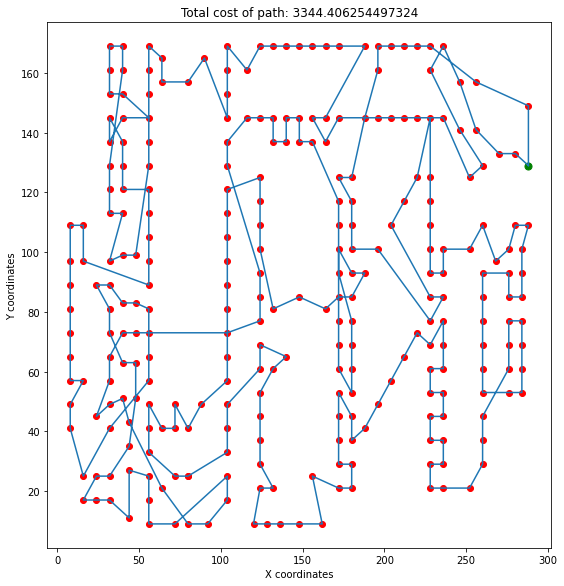

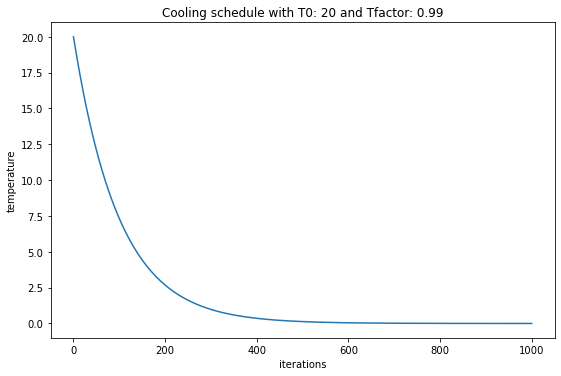

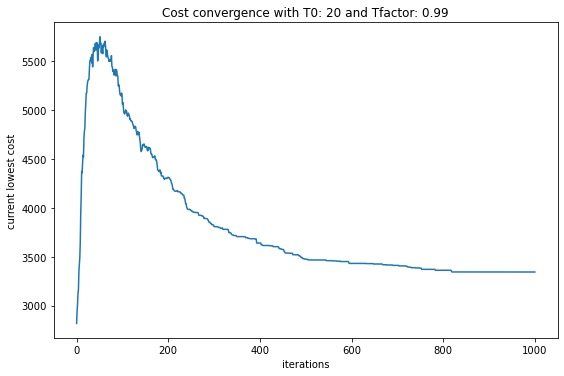

In [23]:
# DON'T FORGET TO DELETE SAVEFIG LINES BEFORE HANDING IN

# Plot optimal path
total_cost = get_total_distance(coordinates)                             
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Total cost of path: {}".format(total_cost))
x = np.array(np.append(coordinates[0], coordinates[0][0])) # make sure that path is round
y = np.array(np.append(coordinates[1], coordinates[1][0])) # make sure that path is round
plt.plot(x, y) # plot path
plt.scatter(coordinates[0][1:], coordinates[1][1:], c="red") # plot cities
plt.scatter(coordinates[0][0], coordinates[1][0], s=50, c="green") # starting city
plt.savefig("figs/path280_result_runs{1}_Tstart{2}_factor{3}.png".format(i, RUNS, initial_T, FACTOR), dpi=300)
ax.set_xlabel("X coordinates")
ax.set_ylabel("Y coordinates")
plt.show()

# Plot cooling schedule
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cooling schedule with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(T_list)
plt.savefig("figs/temperature280_result_runs{1}_Tstart{2}_factor{3}.png".format(i, RUNS, initial_T, FACTOR), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("temperature")
plt.show()

# Plot cost convergence
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cost convergence with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(cost_list)
plt.savefig("figs/temperature280_result_runs{1}_Tstart{2}_factor{3}.png".format(i, RUNS, initial_T, FACTOR), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("current lowest cost")
plt.show()


In [24]:
# Initialize the model parameters
# Make sure results are saved in lists to enable plotting
RUNS = 1000
T = 50
FACTOR = 0.99
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

initial_T = T
T_list = [T]

initial_cost = get_total_distance(coordinates)
cost_list = [initial_cost]
current_cost = initial_cost

# The number of iterations is twice the length of the markov chain
for i in range(RUNS):
    print(i, 'cost = ', current_cost)
    T = initial_T/(1+np.log(1+i))
    T_list.append(T)
    
    for j in range(500):
        coord1, coord2 = np.random.randint(0, len(coordinates[0]), size=2)
        temp = [coordinates[0, coord1], coordinates[1, coord1]]
        coordinates[0, coord1] = coordinates[0, coord2]
        coordinates[1, coord1] = coordinates[1, coord2]
        coordinates[0, coord2] = temp[0]
        coordinates[1, coord2] = temp[1]
        new_cost = get_total_distance(coordinates)
        
        # accept the new route if its faster than the current fastest route
        if new_cost < current_cost:
            current_cost = new_cost
            
        # if not faster, uniformly pick a random variable and if this is lower than 
        # the markovian acceptance probability, accept the new route
        else:
            x = np.random.uniform()
            if x < np.exp((current_cost - new_cost)/T):
                current_cost = new_cost
            else:
                temp = [coordinates[0, coord1], coordinates[1, coord1]]
                coordinates[0, coord1] = coordinates[0, coord2]
                coordinates[1, coord1] = coordinates[1, coord2]
                coordinates[0, coord2] = temp[0]
                coordinates[1, coord2] = temp[1]
                
    cost_list.append(current_cost)


0 cost =  2818.621642239474
1 cost =  3818.3427061545594
2 cost =  4152.188794294943
3 cost =  4464.753100442822
4 cost =  4611.468218053656
5 cost =  4718.647569261834
6 cost =  4755.430583346369
7 cost =  4836.063095927776
8 cost =  5004.493024462823
9 cost =  5028.918717595774
10 cost =  5073.300939047919
11 cost =  5066.865859988791
12 cost =  5080.321552508851
13 cost =  5042.396000138613
14 cost =  5132.713867584351
15 cost =  5161.158992084873
16 cost =  5218.361642648383
17 cost =  5198.298325834396
18 cost =  5191.082254007718
19 cost =  5177.412179853769
20 cost =  5176.389742491739
21 cost =  5168.544958581286
22 cost =  5141.622694087507
23 cost =  5131.241957020965
24 cost =  5109.663083142563
25 cost =  5124.813907876227
26 cost =  5131.246519460759
27 cost =  5213.09777375633
28 cost =  5228.524484704567
29 cost =  5220.94903862306
30 cost =  5129.553368715789
31 cost =  5141.035031043974
32 cost =  5224.477196916799
33 cost =  5198.078403628188
34 cost =  5226.739431679

280 cost =  4425.520968546493
281 cost =  4442.853121489052
282 cost =  4428.16000921643
283 cost =  4404.780666769522
284 cost =  4393.398238415919
285 cost =  4396.139427297736
286 cost =  4346.037337897963
287 cost =  4343.49106085555
288 cost =  4384.966139624318
289 cost =  4377.221394529114
290 cost =  4375.051803315511
291 cost =  4431.961315562624
292 cost =  4462.323971659595
293 cost =  4491.420883214532
294 cost =  4487.254192361783
295 cost =  4476.372332551571
296 cost =  4471.563637471368
297 cost =  4481.655856203247
298 cost =  4500.09283705486
299 cost =  4531.899158399332
300 cost =  4541.557547338989
301 cost =  4599.455972611202
302 cost =  4601.79093543169
303 cost =  4576.412880575444
304 cost =  4611.2397821412615
305 cost =  4602.628316863432
306 cost =  4635.975883056304
307 cost =  4628.298822209124
308 cost =  4640.493330273011
309 cost =  4604.0244003205835
310 cost =  4617.985854928534
311 cost =  4601.166012617621
312 cost =  4617.676642341156
313 cost =  

557 cost =  4222.202725262953
558 cost =  4218.670227049307
559 cost =  4205.2016750849125
560 cost =  4168.81595578603
561 cost =  4166.615839079633
562 cost =  4196.18160883334
563 cost =  4203.784737216989
564 cost =  4194.373363628644
565 cost =  4198.535772277037
566 cost =  4209.3056898592085
567 cost =  4202.42177308474
568 cost =  4204.670336419626
569 cost =  4189.846905069896
570 cost =  4168.797673596319
571 cost =  4125.968606857537
572 cost =  4130.500420991928
573 cost =  4161.671321136281
574 cost =  4179.461043988543
575 cost =  4192.283912750525
576 cost =  4176.521340178674
577 cost =  4129.502259740356
578 cost =  4118.555749830331
579 cost =  4118.897933074035
580 cost =  4134.888048933144
581 cost =  4160.557594459426
582 cost =  4149.24388596044
583 cost =  4142.975358015713
584 cost =  4150.7835673036125
585 cost =  4191.495198376056
586 cost =  4201.906222318552
587 cost =  4196.899358712641
588 cost =  4176.926566152075
589 cost =  4158.937594179552
590 cost = 

843 cost =  4041.436491632116
844 cost =  4043.184535347316
845 cost =  4063.634003418168
846 cost =  4042.1654514537736
847 cost =  4024.19799185568
848 cost =  3987.318712430907
849 cost =  3985.5249108839907
850 cost =  3957.2183716796403
851 cost =  3968.759610953842
852 cost =  3978.2350786660977
853 cost =  3975.3317939593394
854 cost =  3976.2176204439916
855 cost =  3980.4934881527793
856 cost =  3996.9129028241473
857 cost =  4015.0622546636237
858 cost =  3986.5985262095933
859 cost =  3996.719032134962
860 cost =  3995.391171481056
861 cost =  3998.238586671426
862 cost =  3991.6256569678985
863 cost =  4037.559183812921
864 cost =  4034.717844787133
865 cost =  4055.3837331915174
866 cost =  4067.5299010041986
867 cost =  4086.5667669421077
868 cost =  4086.18767223157
869 cost =  4064.814292209533
870 cost =  4072.0388114410225
871 cost =  4084.725102942038
872 cost =  4032.2196795770737
873 cost =  4018.480405705827
874 cost =  4017.543653669692
875 cost =  4033.543653669

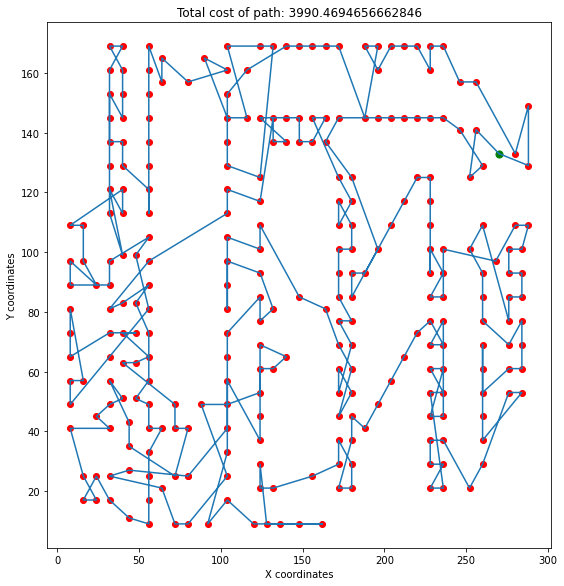

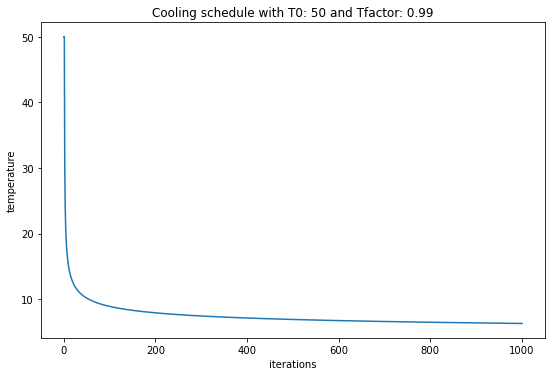

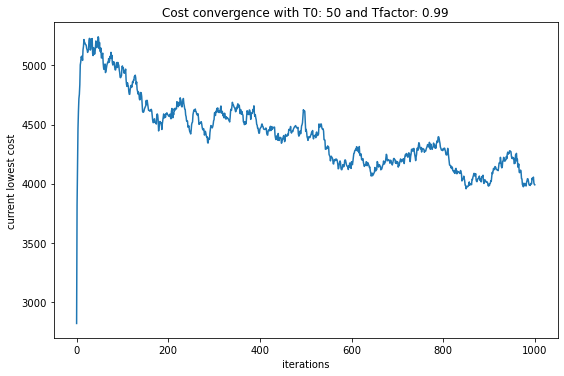

In [25]:
# DON'T FORGET TO DELETE SAVEFIG LINES BEFORE HANDING IN

# Plot optimal path
total_cost = get_total_distance(coordinates)                             
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Total cost of path: {}".format(total_cost))
x = np.array(np.append(coordinates[0], coordinates[0][0])) # make sure that path is round
y = np.array(np.append(coordinates[1], coordinates[1][0])) # make sure that path is round
plt.plot(x, y) # plot path
plt.scatter(coordinates[0][1:], coordinates[1][1:], c="red") # plot cities
plt.scatter(coordinates[0][0], coordinates[1][0], s=50, c="green") # starting city
plt.savefig("figs/path280_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("X coordinates")
ax.set_ylabel("Y coordinates")
plt.show()

# Plot cooling schedule
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cooling schedule with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(T_list)
plt.savefig("figs/temperature280_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("temperature")
plt.show()

# Plot cost convergence
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cost convergence with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(cost_list)
plt.savefig("figs/temperature280_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("current lowest cost")
plt.show()


In [26]:
# Initialize the model parameters
# Make sure results are saved in lists to enable plotting
RUNS = 2000
T = 50
FACTOR = 0.99
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

initial_T = T
T_list = [T]

initial_cost = get_total_distance(coordinates)
cost_list = [initial_cost]
current_cost = initial_cost

# The number of iterations is twice the length of the markov chain
for i in range(RUNS):
    print(i, 'cost = ', current_cost)
    T = initial_T/(1+np.log(1+i))
    T_list.append(T)
    
    for j in range(500):
        coord1, coord2 = np.random.randint(0, len(coordinates[0]), size=2)
        temp = [coordinates[0, coord1], coordinates[1, coord1]]
        coordinates[0, coord1] = coordinates[0, coord2]
        coordinates[1, coord1] = coordinates[1, coord2]
        coordinates[0, coord2] = temp[0]
        coordinates[1, coord2] = temp[1]
        new_cost = get_total_distance(coordinates)
        
        # accept the new route if its faster than the current fastest route
        if new_cost < current_cost:
            current_cost = new_cost
            
        # if not faster, uniformly pick a random variable and if this is lower than 
        # the markovian acceptance probability, accept the new route
        else:
            x = np.random.uniform()
            if x < np.exp((current_cost - new_cost)/T):
                current_cost = new_cost
            else:
                temp = [coordinates[0, coord1], coordinates[1, coord1]]
                coordinates[0, coord1] = coordinates[0, coord2]
                coordinates[1, coord1] = coordinates[1, coord2]
                coordinates[0, coord2] = temp[0]
                coordinates[1, coord2] = temp[1]
                
    cost_list.append(current_cost)


0 cost =  2818.621642239474
1 cost =  4458.162456734335
2 cost =  4726.605197817025
3 cost =  4762.971296367599
4 cost =  4804.751350053961
5 cost =  5004.359579953823
6 cost =  5058.895995945871
7 cost =  5141.61258884932
8 cost =  5208.413090692333
9 cost =  5246.723552552248
10 cost =  5223.444963573768
11 cost =  5226.013146016633
12 cost =  5169.653843936854
13 cost =  5287.641304683078
14 cost =  5343.628203742391
15 cost =  5338.939298152262
16 cost =  5408.025131208792
17 cost =  5383.019035475218
18 cost =  5410.521165322753
19 cost =  5347.66113547633
20 cost =  5346.977363465602
21 cost =  5373.605858295141
22 cost =  5380.411655823169
23 cost =  5467.340553318897
24 cost =  5453.307986838971
25 cost =  5324.905649011691
26 cost =  5290.652175183332
27 cost =  5235.6740728353225
28 cost =  5204.514794867787
29 cost =  5210.971613753262
30 cost =  5213.957451806771
31 cost =  5256.324469216731
32 cost =  5166.528590297764
33 cost =  5128.133077217183
34 cost =  5128.133077217

321 cost =  4439.53854259814
322 cost =  4456.602041189159
323 cost =  4456.49502066379
324 cost =  4464.84958669811
325 cost =  4436.494978708421
326 cost =  4485.555181961551
327 cost =  4481.452187693911
328 cost =  4477.951245557827
329 cost =  4457.855276595463
330 cost =  4467.7438204154605
331 cost =  4469.039237656619
332 cost =  4457.959784415207
333 cost =  4413.86837397559
334 cost =  4365.60267404934
335 cost =  4405.689740553275
336 cost =  4394.224705467755
337 cost =  4411.112112428549
338 cost =  4408.8033489371355
339 cost =  4416.5169914326825
340 cost =  4446.7397443172595
341 cost =  4434.107794415035
342 cost =  4464.962233949135
343 cost =  4503.426174679158
344 cost =  4494.338398778763
345 cost =  4515.382532395049
346 cost =  4497.019185143034
347 cost =  4478.575185267322
348 cost =  4489.457538012852
349 cost =  4485.933194661212
350 cost =  4453.723683331061
351 cost =  4473.9421837599375
352 cost =  4437.077937628918
353 cost =  4438.365317266398
354 cost =

603 cost =  4096.377461268234
604 cost =  4117.114888729189
605 cost =  4139.730266548855
606 cost =  4133.421730873253
607 cost =  4138.232124804517
608 cost =  4120.268509576469
609 cost =  4095.8158297983846
610 cost =  4095.477902730735
611 cost =  4070.493642123287
612 cost =  4044.559299802979
613 cost =  4068.3579946846567
614 cost =  4054.674946051129
615 cost =  4082.6101523938223
616 cost =  4126.010771723339
617 cost =  4112.299433020716
618 cost =  4115.081920756481
619 cost =  4135.137463519595
620 cost =  4182.48624006756
621 cost =  4170.442852782153
622 cost =  4200.906482611777
623 cost =  4193.5538127666405
624 cost =  4185.9773479980995
625 cost =  4185.9773479980995
626 cost =  4179.535886852006
627 cost =  4202.859163414368
628 cost =  4222.811004582769
629 cost =  4220.581799396677
630 cost =  4224.075012674859
631 cost =  4205.994530930132
632 cost =  4181.714119855049
633 cost =  4108.094228552151
634 cost =  4109.795074104011
635 cost =  4117.902371662917
636 c

881 cost =  4191.833714642266
882 cost =  4179.146237083295
883 cost =  4183.862022464187
884 cost =  4256.610221368758
885 cost =  4259.027681206332
886 cost =  4266.386860962493
887 cost =  4256.763361127152
888 cost =  4262.911149787294
889 cost =  4248.194594619486
890 cost =  4259.294667685174
891 cost =  4262.103131939729
892 cost =  4255.519177059726
893 cost =  4284.412581866668
894 cost =  4270.021229068123
895 cost =  4263.797489430149
896 cost =  4239.303308655909
897 cost =  4256.698790908094
898 cost =  4225.482953975576
899 cost =  4197.073562848452
900 cost =  4172.42925643524
901 cost =  4160.206344075236
902 cost =  4165.6842772670925
903 cost =  4167.874827846826
904 cost =  4143.22233900542
905 cost =  4125.058114312547
906 cost =  4105.92319207677
907 cost =  4121.923192076769
908 cost =  4108.798231307454
909 cost =  4109.153899598761
910 cost =  4089.5372093282826
911 cost =  4065.1481919079533
912 cost =  4084.2676021389175
913 cost =  4088.9538936399326
914 cost

1153 cost =  4023.4126398994817
1154 cost =  4024.178049825172
1155 cost =  4029.16640020497
1156 cost =  4019.277856384972
1157 cost =  4030.4393397764516
1158 cost =  4023.9132819926776
1159 cost =  4007.6567782264556
1160 cost =  3997.2950217925177
1161 cost =  3998.805313065866
1162 cost =  4002.9288990360333
1163 cost =  4003.7140580655428
1164 cost =  4024.773088065277
1165 cost =  4044.0469108786574
1166 cost =  4046.363578954773
1167 cost =  4052.425002582462
1168 cost =  4052.425002582462
1169 cost =  4051.9746827580457
1170 cost =  4032.8674007850964
1171 cost =  4012.1279685187524
1172 cost =  4013.644414445287
1173 cost =  4045.3681529649043
1174 cost =  4015.928807762073
1175 cost =  4010.462899714653
1176 cost =  4027.2345924622246
1177 cost =  4036.7123388181676
1178 cost =  4023.066329399803
1179 cost =  4001.8468983908174
1180 cost =  3979.9351656233903
1181 cost =  3987.8825839464344
1182 cost =  3998.6076387552785
1183 cost =  3998.9553571526494
1184 cost =  3998.819

1415 cost =  3978.3686841305066
1416 cost =  3990.871696658831
1417 cost =  3988.2434444643022
1418 cost =  3965.903834020031
1419 cost =  3970.141262354685
1420 cost =  3977.154179455627
1421 cost =  3988.4470460728558
1422 cost =  4016.134281738046
1423 cost =  4007.0955392402957
1424 cost =  4013.045385464382
1425 cost =  3993.911202039993
1426 cost =  3994.293413155882
1427 cost =  4023.8888529228016
1428 cost =  4019.9664686243395
1429 cost =  3951.7109737917053
1430 cost =  3967.869092494402
1431 cost =  3954.899230217328
1432 cost =  3965.890193953757
1433 cost =  3914.998501170551
1434 cost =  3914.998501170551
1435 cost =  3912.7806534075007
1436 cost =  3917.9884107724456
1437 cost =  3913.16839140459
1438 cost =  3917.5156972505397
1439 cost =  3920.4662458335292
1440 cost =  3938.9271091309133
1441 cost =  3927.6134006319285
1442 cost =  3937.9371401474223
1443 cost =  3956.466344979578
1444 cost =  3944.011255817112
1445 cost =  3948.2767686956813
1446 cost =  3947.9449332

1678 cost =  3928.8807595584644
1679 cost =  3956.951829665955
1680 cost =  3971.5266649869677
1681 cost =  3968.646957395266
1682 cost =  3984.5021525946063
1683 cost =  3971.080345343092
1684 cost =  3954.3998370593604
1685 cost =  3955.489104330283
1686 cost =  3964.9771818818654
1687 cost =  3954.9065897804967
1688 cost =  3945.618632843261
1689 cost =  3967.6094765728412
1690 cost =  3995.5132166091935
1691 cost =  3987.8991955831684
1692 cost =  3984.364588516923
1693 cost =  4002.262985580593
1694 cost =  4006.5977847639265
1695 cost =  3997.8610211413484
1696 cost =  4024.531781719736
1697 cost =  4022.914916097229
1698 cost =  4022.7497628781566
1699 cost =  4040.685061306262
1700 cost =  4047.4404889713987
1701 cost =  4019.6914334456837
1702 cost =  4026.5740597208837
1703 cost =  4072.5866830782625
1704 cost =  4067.0247767647425
1705 cost =  4059.2436497530666
1706 cost =  4021.1014008947254
1707 cost =  4017.245339993808
1708 cost =  4003.686299706669
1709 cost =  4012.49

1942 cost =  3945.9414310138377
1943 cost =  3942.2579252963646
1944 cost =  3934.285798814461
1945 cost =  3931.0246719924316
1946 cost =  3926.4129171609325
1947 cost =  3892.6630776183392
1948 cost =  3883.339694435381
1949 cost =  3882.435995620324
1950 cost =  3895.283006559485
1951 cost =  3905.8877327932
1952 cost =  3916.813703295096
1953 cost =  3974.768041357692
1954 cost =  3981.8719225594996
1955 cost =  3992.307565030353
1956 cost =  3991.7745694329406
1957 cost =  3990.964952495334
1958 cost =  3985.6478013630253
1959 cost =  3962.7372531613505
1960 cost =  3969.22954787816
1961 cost =  3973.5056229205775
1962 cost =  3971.7728025778556
1963 cost =  3943.1907476790598
1964 cost =  3969.8776725979637
1965 cost =  3971.752677461113
1966 cost =  3962.385599505044
1967 cost =  3951.2012462644725
1968 cost =  3978.5178160696305
1969 cost =  3966.1756576848975
1970 cost =  3955.075390684371
1971 cost =  3951.8483601109588
1972 cost =  3974.8948470219248
1973 cost =  4048.290886

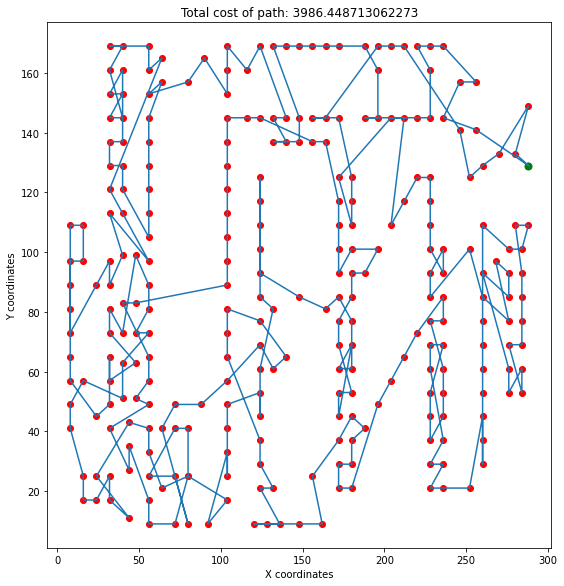

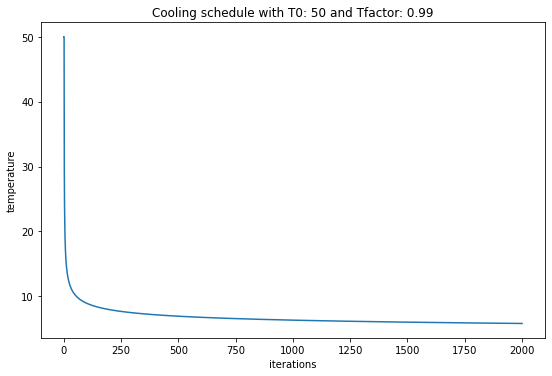

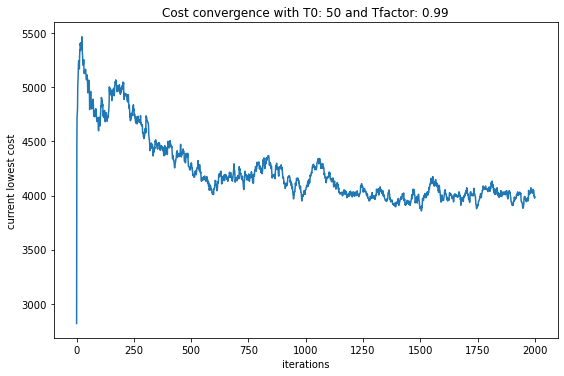

In [27]:
# DON'T FORGET TO DELETE SAVEFIG LINES BEFORE HANDING IN

# Plot optimal path
total_cost = get_total_distance(coordinates)                             
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Total cost of path: {}".format(total_cost))
x = np.array(np.append(coordinates[0], coordinates[0][0])) # make sure that path is round
y = np.array(np.append(coordinates[1], coordinates[1][0])) # make sure that path is round
plt.plot(x, y) # plot path
plt.scatter(coordinates[0][1:], coordinates[1][1:], c="red") # plot cities
plt.scatter(coordinates[0][0], coordinates[1][0], s=50, c="green") # starting city
plt.savefig("figs/path280_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("X coordinates")
ax.set_ylabel("Y coordinates")
plt.show()

# Plot cooling schedule
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cooling schedule with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(T_list)
plt.savefig("figs/temperature280_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("temperature")
plt.show()

# Plot cost convergence
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cost convergence with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(cost_list)
plt.savefig("figs/temperature280_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("current lowest cost")
plt.show()
